<a href="https://colab.research.google.com/github/manlio99/DeTodoUnPoco/blob/main/Unet_Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example Image segmentation with CamVid

https://medium.com/analytics-vidhya/image-segmentation-using-fastai-ddded25f811e

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/FastAI-Code-Collection/blob/v1/Image_segmentation_on_CamVid_dataset.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/FastAI-Code-Collection/blob/v1/Image_segmentation_on_CamVid_dataset.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

In [159]:
!pip install fastai==1.0.61

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [162]:
# path = untar_data(URLs.CAMVID)
# path.ls()
# path_lbl = path/'labels'
# path_img = path/'images'

In [163]:
path_lbl = "/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/etiqueta_molar_premolar_caninos_incisivos/"
path_img = "/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/images/"


## Data

In [164]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/images/0.png'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/images/1.png'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/images/2.png')]

In [165]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/etiqueta_molar_premolar_caninos_incisivos/0.png'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/etiqueta_molar_premolar_caninos_incisivos/1.png'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/etiqueta_molar_premolar_caninos_incisivos/2.png')]

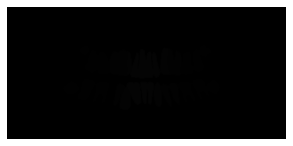

In [166]:
img_f = lbl_names[0]
img = open_image(img_f)
img.show(figsize=(5, 5))

In [167]:
get_y_fn = lambda x: x

In [168]:
img_f

PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/etiqueta_molar_premolar_caninos_incisivos/0.png')

In [169]:
get_y_fn(img_f)

PosixPath('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/etiqueta_molar_premolar_caninos_incisivos/0.png')

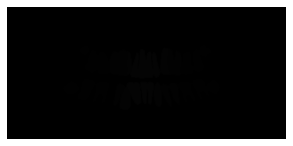

In [170]:
img = open_image(img_f)
img.show(figsize=(5,5))

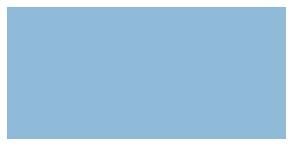

In [171]:
mask = open_mask(get_y_fn(img_f),div=True)
mask.show(figsize=(5, 5))

In [172]:
src_size = np.array(mask.shape[1:])
src_size, mask.data

(array([302, 640]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [173]:
codes = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/labels.txt', dtype=str)
# codes = np.array(["molares", "premolares", "caninos", "incisivos"], dtype=str)
codes

array(['encia', 'molares', 'premolares', 'caninos', 'incisivos'], dtype='<U10')

## Datasets

In [174]:
size = (360, 480) #src_size//4

free = gpu_mem_get_free_no_cache()
if free > 8200: 
  bs=8
else:
  bs=4
print(f"using bs={bs}, have {free} MB of GPU RAM free")
size

using bs=4, have 0 MB of GPU RAM free


(360, 480)

In [175]:
src = (SegmentationItemList.from_folder(path_img)
       .split_none()
       .label_from_func( get_y_fn, classes=codes))
# .split_by _fname_file('../valid.txt')

In [176]:
data = (src.transform(get_transforms(flip_vert=False,max_rotate=1.0,), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

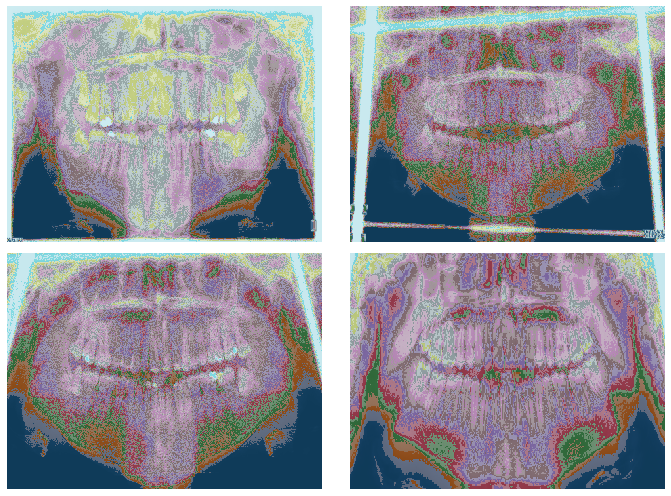

In [177]:
data.show_batch(2, figsize=(10, 7))

In [178]:
# data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [179]:
# create unet
learn = unet_learner(data, models.resnet34, metrics = accuracy)

In [180]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


IndexError: ignored

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('/content/drive/MyDrive/Colab Notebooks/odontologia/mask_folder/fastai_dientes_1')

In [ ]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [ ]:
metrics = acc_camvid

In [ ]:
wd = 1e-2

In [ ]:
lr = 3e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

In [ ]:
learn.show_results(rows=3, figsize=(8, 9))

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(12, slice(lr/400, lr/4), pct_start=0.8)

In [ ]:
learn.show_results(rows=3, figsize=(10, 10))

In [ ]:
learn.save('camvid-stage-2')

## Train on bigger images

In [ ]:
learn.destroy()

size = src_size // 1.5

free = gpu_mem_get_free_no_cache()
if free > 8200: 
  bs=3
else: 
  bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

In [ ]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [ ]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [ ]:
learn.load('camvid-stage-2');

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 3e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

In [ ]:
learn.save('camvid-big-stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, slice(1e-6, lr/10))

In [ ]:
learn.save('stage-2-big')

## Interpretation

In [ ]:
learn.show_results(rows=3, figsize=(10, 10))